Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 10**: One challenge in astronomy is to find the trajectory of a light object in the presence of two much heavier bodies whose motion is not influenced by the light object. The typical case would be the motion of a satellite in the Earth-Moon system.

If all three objects move in the $x-y$ plane, the motion of the light object is described by dimensionless, second-order  ODE's $$\frac{d^{2}x(t)}{dt^{2}}=x(t)+2\,\frac{dy(t)}{dt}-\frac{(1-\mu)\,(x(t)+\mu)}{r^{3}}-\frac{\mu\,(x(t)-1+\mu)}{s^{3}}$$ and $$\frac{d^{2}y(t)}{dt^{2}}=y(t)-2\,\frac{dx(t)}{dt}-\frac{(1-\mu)\,y(t)}{r^{3}}-\frac{\mu\,y(t)}{s^{3}},$$ where $\mu$ is the ratio of masses of the heavy objects, $x(t)$ and $y(t)$ are the coordinates of the light object and $$r=\sqrt{(x(t)+\mu)^{2}+y(t)^{2}}\quad{};\;s=\sqrt{(x(t)-1+\mu)^{2}+y(t)^{2}}.$$

**Data**: Consider the time interval $0\leq{}t\leq{}18$ and $\mu=0.01227471$ (Moon to Earth ratio) and initial conditions $x(0)=0.994$, $y(0)=0$, $\frac{dx(t=0)}{dt}=0$ and $\frac{dy(0)}{dt}=-2.0015851$.

**Task**: Write a function `satellite(init, time, mu)` to solve the ODE's. The array of initial conditions, the time interval (see test) and the parameter $\mu$ shall be input to the function. Return the full output of the `solve_ivp` function. Note that for a good plot, define a time evaluation array in the function from start to finish of the interval with 200 points. Hand that array over to `solve_ivp` for its `t_eval` parameter.

Create three plots: **(a)** draw the trajectory coordinate $y(t)$ against $x(t)$, 

**(b)** draw both curves $x(t)$ and $y(t)$ as a function of time on the same plot with a legend and 

**(c)** draw the speeds $dy(t)/dt$ against $dx(t)/dt$. 

All figures should show appropriate axes labels and be drawn as a row$=1$, column$=3$ multi-figure plot.

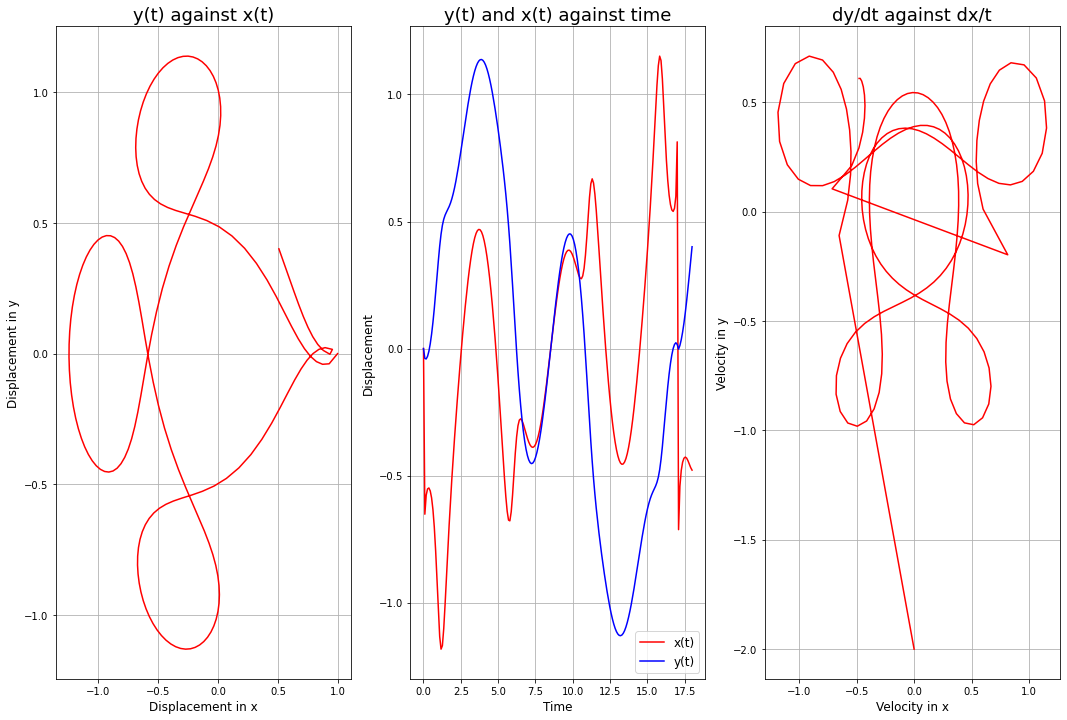

In [1]:
# YOUR CODE HERE
""" My Code """
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def func(t, y, mu_):
    """My Func"""
    _ = t
    x, dx, y_, dy_ = y
    r = np.sqrt((x + mu_) ** 2 + y_ ** 2)
    s = np.sqrt((x - 1 + mu_) ** 2 + y_ ** 2)
    f_0 = dx
    f_1 = x + 2 * dy_ - (1 - mu_) * (x + mu_) / r ** 3
    f_1 = f_1 - mu_ * (x - 1 + mu_) / s ** 3
    f_2 = dy_
    f_3 = y_ - 2 * dx - (1 - mu_) * (y_) / r ** 3 - mu_ * y_ / s ** 3
    return np.array([f_0, f_1, f_2, f_3])


def satellite(init_, time_, mu_):
    """Satellite"""
    evalt = np.linspace(time_[0], time_[1], 200)
    return solve_ivp(func, time_, init_, args=(mu_,), t_eval=evalt)


mu = 0.01227471
init = np.array([0.994, 0.0, 0.0, -2.0015851])
time = [0, 18]
time_range = np.linspace(time[0], time[1], 200)
answer = satellite(init, time, mu)
# Plotting
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.grid(True)
plt.title("y(t) against x(t)", fontsize=18)
plt.xlabel("Displacement in x", fontsize=12)
plt.ylabel("Displacement in y", fontsize=12)
plt.plot(answer.y[0], answer.y[2], "r")
plt.subplot(132)
plt.grid(True)
plt.title("y(t) and x(t) against time", fontsize=18)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Displacement", fontsize=12)
plt.plot(time_range, answer.y[1], "r", label="x(t)")
plt.plot(time_range, answer.y[2], "b", label="y(t)")
plt.legend(fontsize=12)
plt.subplot(133)
plt.grid(True)
plt.title("dy/dt against dx/t", fontsize=18)
plt.xlabel("Velocity in x", fontsize=12)
plt.ylabel("Velocity in y", fontsize=12)
plt.plot(answer.y[1], answer.y[3], "r")
plt.show()


In [2]:
# Test cell, assumes 200 evaluation points
mu = 0.01227471
init = np.array([0.994, 0.0, 0.0, -2.0015851]) # x(0), dxdt(0), y(0), dydt(0)
answer = satellite(init, [0,18], mu)
assert (answer.y[0][10]>0.4 and answer.y[0][10]<0.41), 'wrong x(t)'

In [3]:
# Test cell
assert (answer.y[1][10]>-0.92 and answer.y[1][10]<-0.91), 'wrong speed in x'
assert (answer.y[2][10]>0.28 and answer.y[2][10]<0.29), 'wrong y(t)'
assert (answer.y[3][10]>0.7 and answer.y[3][10]<0.72), 'wrong speed in y'

### Tests 2 marks; Style 1 mark; Plots - 2 marks